In [502]:
#1. 图homeworkre.png包含了代码为000001的股票2016年以来167个交易日的开盘价，请通过skimage.io.imread 将该图片读入为 numpy.ndarray 类型，并编程反推出167个开盘价。第一天数据为1123.9，最后一天数据为1079.02（000001.csv中有真实数据，请给出估计和真实值的差异。）

import numpy as np
import skimage
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#读取图片像素点，存在一个三维数组中：
image=skimage.io.imread('data/homeworkre.png')     
#查看数组的维数
print(image.shape)

first_open=1123.9
last_open=1079.02

(288, 432, 4)


In [503]:
#求出蓝色数据点在图片中的坐标，以图片左上角为原点：
x=[]
y=[]

for j in range(0,432):
    for i in range(0,288):
        if (list(image[i][j])==[0,0,255,255])and(list(image[i-1][j])!=[255,255,255,255])and(list(image[i-2][j])!=[255,255,255,255])and(list(image[i+1][j])!=[255,255,255,255])and(list(image[i+2][j])!=[255,255,255,255])and(image[i+2][j][0]<200)and(image[i-2][j][0]<200):
            y.append(i)
            x.append(j)
            
#将点坐标存在一个二维数组中：           
loc_xy=np.empty((len(x),2),dtype=np.float64)
for i in range(0,len(x)):
    loc_xy[i]=(x[i],y[i])

#计算出每一个像素点的距离相当于多少实际价格上的偏差：
delta=(last_open-first_open)/(loc_xy[len(x)-1][1]-loc_xy[0][1])

#计算每一点对应的实际价格，并保留两位小数：
prix_raw=[]
for i in range(0,len(x)):
    prix_raw.append((loc_xy[i][1]-loc_xy[0][1])*delta+first_open)
    prix_raw[i]=("%0.2f"%prix_raw[i])
prix=[float(x) for x in prix_raw]


166


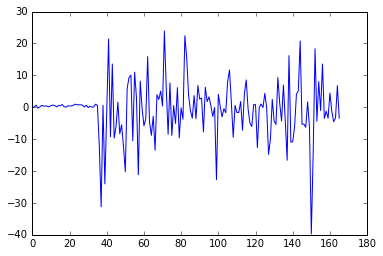

In [504]:
#给出估计值和真实值的差异：
import pandas as pd
from pandas import DataFrame,Series

#比较估计值和真实数据误差：
true_data=pd.read_csv("data/000001.csv")
date=true_data['date'][5836:6002]
open=(true_data['open'][5836:6002]).rename(index=date)
open_estimate=Series(prix,index=date)
error=open-open_estimate
error1=error.reset_index(drop=True)

#画图显示误差大小：
plt.plot(error1)
print(len(prix))


In [505]:
#发现出现显著性差异，结合得到的开盘价数据只有166个，得出之前过滤冗余值时多删除了一个数据点，在此找到该点：
for i in range(0,166):
    if abs(error1[i])<5:
        continue
    else:
        print(i)
        break
        

36


In [506]:
#发现缺失了2016-03-01的数据，在估计值序列中用真实值补上:
prix.insert(36,float("%0.2f"%open[36]))

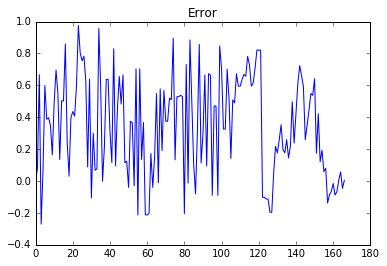

In [518]:
#序列长度为167，重新定义时间周期，画出误差图像：
date=true_data['date'][5836:6003]
open=(true_data['open'][5836:6003]).rename(index=date)
open_estimate=Series(prix,index=date)
error2=(open-open_estimate).reset_index(drop=True)
plt.plot(error2)
plt.title('Error')
#误差在正负1之内，和预期一致


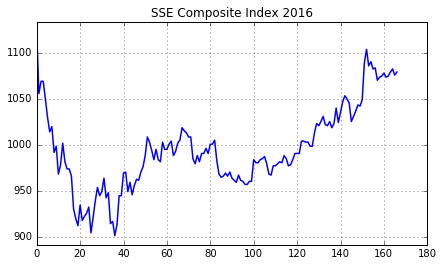

In [520]:
#根据估计值画出图像，并设置相关参数:
plt.figure(figsize=(7, 4))
plt.plot(prix, 'b', lw=1.5)
plt.grid(True)
plt.ylim(np.min(prix) - 10,
         np.max(prix) + 10)
plt.title("SSE Composite Index 2016")